## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [2]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [3]:
# Cells for you to work and document as necessary - 
# definitely feel free to add more cells as you need

In [4]:
# show the shape of training data
train_data.shape

(84534, 10)

In [5]:
# show columns of training data
train_data.columns

Index(['ID', 'Promotion', 'purchase', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7'],
      dtype='object')

In [6]:
# show the unique values of each column
train_data.nunique()

ID           84534
Promotion        2
purchase         2
V1               4
V2           84518
V3              40
V4               2
V5               4
V6               4
V7               2
dtype: int64

In [7]:
# show unqiue values of promotion column
train_data['Promotion'].value_counts()

Yes    42364
No     42170
Name: Promotion, dtype: int64

In [8]:
# show unqiue values of purchase column
train_data['purchase'].value_counts()

0    83494
1     1040
Name: purchase, dtype: int64

In [9]:
# show unqiue values of V1 column
train_data['V1'].value_counts()

1    31631
2    31608
3    10670
0    10625
Name: V1, dtype: int64

In [10]:
# show unqiue values of V2 column
train_data['V2'].value_counts()

26.912599    2
34.076900    2
33.927190    2
22.250347    2
35.078979    2
            ..
37.130170    1
28.167445    1
27.424378    1
20.171599    1
27.926363    1
Name: V2, Length: 84518, dtype: int64

In [11]:
# show the range of value in V2 column
train_data['V2'].min(), train_data['V2'].max()

(7.10400719, 50.3759126)

In [12]:
# show unqiue values of V3 column
train_data['V3'].value_counts().head()

 1.085939    2221
-1.165083    2208
-0.299306    2188
-1.424817    2171
 1.605406    2163
Name: V3, dtype: int64

In [13]:
# show the range of value in V3 column
train_data['V3'].min(), train_data['V3'].max()

(-1.6845501, 1.6919836)

In [14]:
# show unqiue values of V4 column
train_data['V4'].value_counts()

2    57450
1    27084
Name: V4, dtype: int64

In [15]:
# show unqiue values of V5 column
train_data['V5'].value_counts()

3    32743
2    31196
1    15412
4     5183
Name: V5, dtype: int64

In [16]:
# show unqiue values of V6 column
train_data['V6'].value_counts()

3    21186
4    21176
2    21146
1    21026
Name: V6, dtype: int64

In [17]:
# show unqiue values of V7 column
train_data['V7'].value_counts()

2    59317
1    25217
Name: V7, dtype: int64

## Summary: 
The training data consists of 84534 rows and 10 columns. The columns are: 
'ID': present the user ID;
'Promotion': means if the user has received the promotion. It presents by "Yes" or "No". The number of these two group is similar;
'purchase': means if the user bought the coffee. We consider "1" means the customer bought the coffee, while "0" means they did't;
The following columns 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7' present different unknown features. Only the "V2" and "V3" columns possess float number(the values in "V2" are all positive, ranges from 7.10400719 to 50.3759126; while values in "V3" have both negative and possitive number, ranges from -1.6845501 to 1.6919836.)

# Part I 

My first step will be to analysze our invariant metric of number of participants in our control ans experiemental groups.

Hypothesis:

         H_{0}:Exp_{participate} - Control_{participate} = 0
         H_{a}:Exp_{participate} - Control_{participate} > 0
         \alpha = 0.05              

In [18]:
# checking the number of individuak in each group 
print("The number who received the promotion:{} and the number of who did not :{}.".format((train_data.Promotion == "Yes").sum(),(train_data.Promotion == "No").sum()))

The number who received the promotion:42364 and the number of who did not :42170.


In [19]:
# calculating a meassurable statistic in the difference of our group size 
Promotion_avg = (train_data.Promotion == 'Yes').sum()/train_data.shape[0]
Non_Promotion_avg = (train_data.Promotion == 'No').sum()/train_data.shape[0]
sample_diff = Promotion_avg - Non_Promotion_avg

In [20]:
sample_diff

0.00229493458253488

In [21]:
#boostraping our difference to get a model of the distribution for 
difference = []
for _ in range(10000):
    bootsamp = train_data.sample(30000,replace= True)
    Promotion_avg = ((bootsamp.Promotion == 'Yes').sum())/bootsamp.shape[0]
    Non_Promotion_avg = ((bootsamp.Promotion == 'No').sum())/bootsamp.shape[0]
    difference.append(Promotion_avg)

Text(0.5, 1.0, 'Normal distribution of sampling difference')

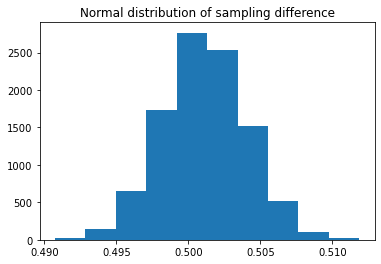

In [22]:
# Visualization of our distrubution 
plt.hist(difference)
plt.title('Normal distribution of sampling difference')

Text(0.5, 1.0, 'Normal distribution under the null hypothesis')

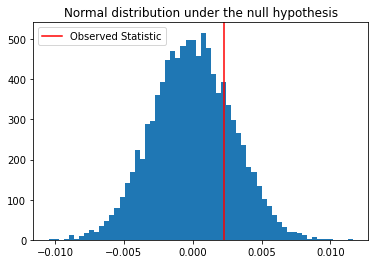

In [23]:
# distribution of our null hypothesis 
null_vals = np.random.normal(0,np.std(difference),10000)
plt.hist(null_vals, bins = 60)
plt.axvline(sample_diff, color = "r", label = "Observed Statistic")
plt.legend(loc = 'upper left')
plt.title('Normal distribution under the null hypothesis')

In [24]:
sample_diff

0.00229493458253488

In [25]:
# determining the signifigance of our result 
p_val = (sample_diff > null_vals).mean()
p_val

0.7841

Conclusion :
Our p value is well within our cinfidence interval and therefore we **fail to reject the null hypothsis**. This implies that there is **no statistical signifigance in the difference of our sampling populations**.

# Part II : analyzing NIR effect 

Below we shall determine if the experiment had a possitive effect on the NIR metric.

             H_{0} : NetIncremenatalRevenue = 0
             H_{a} : NetIncremenatalRevenue > 0
             \alpha = 0.05
Our alpha value with the bonferroni correction: 

              bonferronicorrection = \alpha /(# meassure) = 0.025
              where 
              NIR = (10 * ......)

In [26]:
# number of purchases in the control group
train_data[train_data.Promotion == "Yes"].purchase.sum()

721

In [27]:
# find our observed statistic 
purchase_treatment  = train_data[train_data.Promotion == "Yes"].purchase.sum()
customer_treatment = train_data[train_data.Promotion == "Yes"].shape[0]
purchase_control = train_data[train_data.Promotion == "No"].purchase.sum()
NIR_sample_dif = (10*purchase_treatment - 0.15 * customer_treatment) - 10 * purchase_control
NIR_sample_dif

-2334.5999999999995

In [28]:
# bootstraping our difference to get a model of the distribution for our null 
NIR = []
for _ in range(10000):
    bootsample = train_data.sample(30000, replace= True)
    purchase_treatment = bootsample[bootsample['Promotion'] == "Yes"].purchase.sum()
    customer_treatment = bootsample[bootsample['Promotion'] == "Yes"].shape[0]
    purchase_control = bootsample[bootsample['Promotion'] == 'No'].purchase.sum()
    NIR.append((10*purchase_treatment - 0.15 * customer_treatment) - 10 * purchase_control)

Text(0.5, 1.0, 'Normal distribution under the null hypothesis')

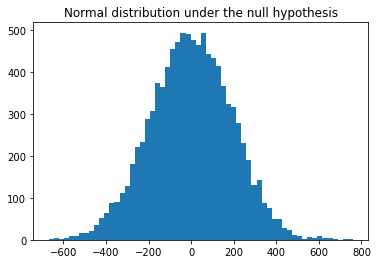

In [29]:
#distribution of our null hypothesis 
null_NIRs = np.random.normal(0,np.std(NIR),10000)
plt.hist(null_NIRs , bins = 60)
plt.title('Normal distribution under the null hypothesis')

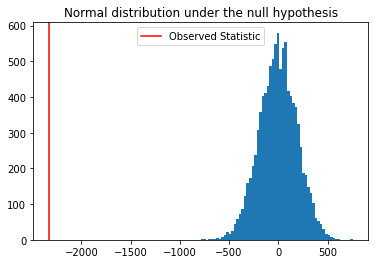

In [30]:
#ploting under the null 
null_NIRs = np.random.normal(0,np.std(NIR),10000)
plt.hist(null_NIRs, bins = 60)
plt.axvline(NIR_sample_dif, color = 'r',label = "Observed Statistic")
plt.title('Normal distribution under the null hypothesis')
plt.legend()

In [31]:
#checking the signifigance is 0 
pval = (NIR > null_NIRs).mean()
pval

0.0016

In [32]:
pval2 = (NIR<null_NIRs).mean()
pval2

0.9984

Conclusion:
our P value is well below our confidence intervak and therefore we fail to reject our null hypothesis. This implies that there is no statistical significant increase in NIR. However, we significantly reduced the NIR with this champion.

# part III: analysing IIR effect 

Belowe we shall determine if the experiment had a postive effect in the IIR metric.
Hypothesis:
            
            H_{0}: IIR = 0 
            H_{a}: IIR > 0

In [33]:
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [34]:
# finding our observed statistic 
purchase_treatment = train_data[train_data['Promotion'] == "Yes"].purchase.sum()
customer_treatment = train_data[train_data['Promotion'] == 'Yes'].shape[0]
purchase_control = train_data[train_data['Promotion'] == 'No'].purchase.sum()
customer_control = train_data[train_data['Promotion'] == "No"].shape[0]
IRR = purchase_treatment/ customer_treatment - purchase_control/customer_control
IRR

0.009454547819772702

In [35]:
# bootstraping our difference to get a model of the distribution for our null 
IRRs = []
for _ in range(10000):
    bootsample2 = train_data.sample(30000, replace= True)
    purchase_treatment = bootsample2[bootsample2['Promotion'] == 'Yes'].purchase.sum()
    customer_treatment = bootsample2[bootsample2['Promotion'] == 'Yes'].shape[0]
    purchase_control = bootsample2[bootsample2['Promotion'] == 'No'].purchase.sum()
    customer_control = bootsample2[bootsample2['Promotion'] == 'No'].shape[0]
    IIR_boot = purchase_treatment/customer_treatment - purchase_control/customer_control
    IRRs.append(IIR_boot)
    

Text(0.5, 1.0, 'Normal districution under null hypothesis')

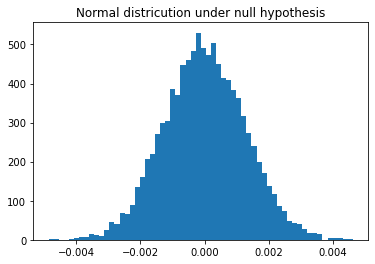

In [36]:
# distribution of our null hypothesis
null_IRRs = np.random.normal(0,np.std(IRRs),10000)
plt.hist(null_IRRs,bins = 60)
plt.title('Normal districution under null hypothesis')

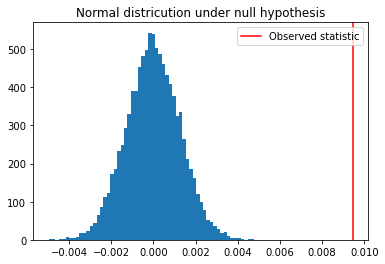

In [37]:
# reviewing our observed statistic against the bootstrapped sample
plt.axvline(IRR, color = 'r',label = 'Observed statistic')
null_IRRs = np.random.normal(0,np.std(IRRs),10000)
plt.hist(null_IRRs,bins = 60)
plt.title('Normal districution under null hypothesis')
plt.legend()

In [38]:
# calculate the significangece of this result 
pval_IRR = (IRR>null_IRRs).mean()
pval_IRR

1.0

Conclusion:
Our P value is well above our null distribution and therefore we *reject the null hypothesis*.This implys that there is a statistical increase in IRR between our control and experimental group.So, we can see that our campaign does have a possitive affect on the number of customers who purchased the product with the promotion,as compared to if they didn't receive the promotion.

# Part IV. Model creation

Here we shall a model that can accurantly predict if a customer will be responsive to the campaign.

In [39]:
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [40]:
# reviewing the number of individuals who purchased products in both the control and experimenatal condition 
train_data.groupby('Promotion').purchase.sum()

Promotion
No     319
Yes    721
Name: purchase, dtype: int64

In [41]:
# copying the dataframe over 
data_exp = train_data.copy()

In [42]:
# only considering the experiment group for our model traning 
data_exp = data_exp[data_exp['Promotion'] == 'Yes']

In [43]:
# dropping the irrelavant columns
data_exp.drop(['ID','Promotion'],axis = 1, inplace= True)

In [44]:
# checking the shape is correct 
data_exp.shape

(42364, 8)

In [45]:
#viewing our data again
data_exp.head()

,purchase,V1,V2,V3,V4,V5,V6,V7
4,0,3,28.044332,-0.385883,1,1,2,2
8,0,2,31.930423,0.393317,2,3,1,2
10,0,1,32.770916,-1.511395,2,1,4,1
12,0,1,36.957009,0.133583,2,3,1,1
14,0,3,36.911714,-0.905350,2,2,4,1


In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [47]:
# splitting our data into predictors and target variables
X = data_exp.drop(['purchase'],axis = 1)
y = data_exp.purchase

In [48]:
#scaling our inputs 
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [49]:
#instantiating our modek and fitting it 
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X,y)

RandomForestClassifier()

In [50]:
#loading in our test data 
test_data = pd.read_csv('./Test.csv')
test_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,2,No,0,1,41.376390,1.172517,1,1,2,2
1,6,Yes,0,1,25.163598,0.653050,2,2,2,2
2,7,Yes,0,1,26.553778,-1.597972,2,3,4,2
3,10,No,0,2,28.529691,-1.078506,2,3,2,2
4,12,No,0,2,32.378538,0.479895,2,2,1,2


In [51]:
#tailoring the test data to test our model
data_exp_test = train_data.copy()
data_exp_test = data_exp_test[data_exp_test['Promotion'] == 'Yes']
data_exp_test.drop(['ID','Promotion'],axis = 1, inplace = True)
X_test = data_exp_test.drop(['purchase'],axis = 1)
y_test = data_exp_test.purchase

In [52]:
# scaling our test input
X_test = min_max_scaler.fit_transform(X_test)

In [53]:
# predicting our target values
y_pred = clf.predict(X_test)

In [54]:
#checking our accurancy for the model 
accuracy = (y_pred == y_test).mean()
print('Our accuracy for the random forest model was {0:.5f}%'.format(accuracy))

Our accuracy for the random forest model was 0.99995%


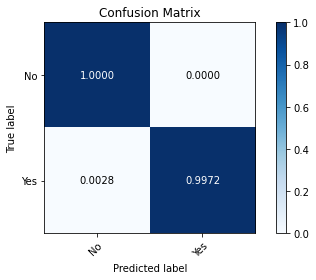

In [55]:
### Creating a confusion matrix visual
confusion_matrix = confusion_matrix(y_test, y_pred)
classes = ['No','Yes']
confusion_matrix  = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(confusion_matrix.shape[1]),
        yticks=np.arange(confusion_matrix.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title="Confusion Matrix",
        ylabel='True label',
        xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
fmt = '.4f'
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, format(confusion_matrix[i, j], fmt),
                ha="center", va="center",
                color="white" if confusion_matrix[i, j] > thresh else "black")
fig.tight_layout()
ax;

In [56]:
# Converting our numeric outputs to Yes/No's 
promotion_yes_no = []
for value in y_pred:
    if value == 0:
        promotion_yes_no.append("No")
    if value == 1:
        promotion_yes_no.append("Yes")

In [57]:
# Converting to a NumPy Array 
np.asarray(promotion_yes_no)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [64]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    # Initialize an empty array to store promotion decisions
    promotion = np.empty(df.shape[0], dtype=str)

    # Loop through each row in the dataframe
    for i, row in df.iterrows():
        # Check conditions to decide whether to give a promotion or not
        if (row['V1'] == 2 and row['V2'] >= 30 and row['V3'] < 0 and
            row['V4'] == 1 and row['V5'] == 1 and row['V6'] > 3 and row['V7'] >= 2):
            promotion[i] = 'Yes'
        else:
            promotion[i] = 'No'
    return promotion

In [66]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice
test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is nan.

Your nir with this strategy is 0.00.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(nan, 0.0)

Model Conclusion
Ha! So, we managed to get a better IRR but a signifigantly worse nir than the experts over at Udacity... Regardless, we still managed a signifigantly better approach than what we had observed with the experiment.

Our confusion matrix indidcated that our accuracy is only hindered by a small number of false negatives. Prehaps if we had a less conservative model we may see a higher NIR rate. Allowing for a higher number of false positives may actually improve our NIR metric at the cost of our IRR.

So to recap,

We trained our model on only those individuals in the experiment (i.e. they were offered the promotion)
Our model would than predict whether or not the individuals would purchase from the promotion offer based on the predicitor variables
We than tested our models NIR and IRR metrics using a local python script.